## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# generate the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# use df.shape to get the dimension details of the dataframe
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
# use df['column_name'].nunique to calcualtion the unique entries in the column
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
# bacause the converted column is 0 or 1 input, so mean() can get the proportion
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# this is the first scenario: treatment and old_page case
df.query('group == "treatment" & landing_page != "new_page"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 308 to 294252
Data columns (total 5 columns):
user_id         1965 non-null int64
timestamp       1965 non-null object
group           1965 non-null object
landing_page    1965 non-null object
converted       1965 non-null int64
dtypes: int64(2), object(3)
memory usage: 92.1+ KB


In [8]:
# this is the second scenario: control and new_page
df.query('group != "treatment" & landing_page == "new_page"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 22 to 294331
Data columns (total 5 columns):
user_id         1928 non-null int64
timestamp       1928 non-null object
group           1928 non-null object
landing_page    1928 non-null object
converted       1928 non-null int64
dtypes: int64(2), object(3)
memory usage: 90.4+ KB


In [9]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape

(3893, 5)

f. Do any of the rows have missing values?

In [10]:
# get the summary of the null input in the dataframe
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# selec the correct entries to df2
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
# use df['column_name'].nunique() to calculate the unique entries number
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
# use df['column_name'].duplicated() to find the specific input in the
# duplicated entries
df2.user_id[df2.user_id.duplicated()]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
# same way, fetch the whole row information
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
# remove the duplicated entry by using index
df2.drop(df2.index[2893]);

In [18]:
# double check the result by inspecting the dimenstion of the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 23.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
# calculate the probability of converting based on all entries in the df2
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# calculat the converting probability of control group
p_control = df2.query('group == "control"')['converted'].mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
# calculate the converting probability of treatment group
p_treatment = df2.query('group == "treatment"')['converted'].mean()
p_treatment

0.11880724790277405

d. What is the probability that an individual received the new page?

In [22]:
# calculate the proportion of the landing_page = new_page
df2.query('landing_page == "new_page"').count()[0]/df2.count()[0]

0.5000636646764286

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

> **From the statistic result calculated based on converted value and group type, it looks like the new_page did not do any improvement on the converting rate;**

> **However, there is another important factor which was not taken into consideration for those calcualtion, the time factor;**

> **The lower converting rate of new_page  or high converting rate of old_page record needs more investigation on the data collection peroid of those records;**

> **Also the information of people in each group need to be gethered, could be old users not confortible with the change, issues like that.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothesis:  the new page is no better than the new page
$$ H_{0}: 
    p_{new}-p_{old}\leq 0 $$

Alternative hypothesis: the new page is better than the new page
$$ H_{1}: 
    p_{new}-p_{old}> 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
# based on the hypothesis, the p_new equals the over all converted rate of data in df2
p_new = df2.converted.mean()
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
# do the same calcualtion for p_old
p_old = df2.converted.mean()
p_old

0.11959667567149027

c. What is $n_{new}$?

In [25]:
# count the n_new
n_new = df2.query('group == "treatment"').user_id.nunique()
n_new

145310

d. What is $n_{old}$?

In [26]:
# count the n_old
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
#simulate n_new transcation and store the converted values in new_page_converted
df_simul_new = df2.sample(n_new)
new_page_converted = df_simul_new.converted

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
#simulate n_old transcation and store the converted values in new_page_converted
df_simul_old = df2.sample(n_old)
old_page_converted = df_simul_old.converted

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
new_page_converted.mean()-old_page_converted.mean()

1.1706241197007028e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

p_diffs = []
for _ in range(10000):
    df_simul_new = df2.sample(n_new, replace=True)
    new_page_converted = df_simul_new.converted
    df_simul_old = df2.sample(n_old, replace=True)
    old_page_converted = df_simul_old.converted
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [30]:
# Note has been taken, this is super useful and helpful, I didn't think of this awesome method!
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

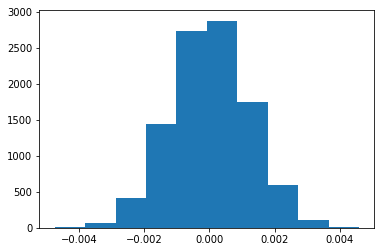

In [31]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

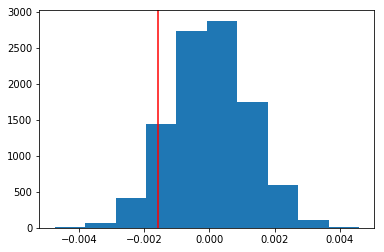

In [32]:
diff = p_treatment-p_control
plt.hist(p_diffs);
plt.axvline(x=diff, color='red');

In [33]:
(p_diffs > diff).mean()

0.90759999999999996

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**It's called p-value, the calculated p-value here indicates there is not a difference between the new and old pages, since$$p > \alpha$$ meaning the statistic failed to reject the Null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm
convert_old = df2.query('group=="control" & converted == 1').shape[0]
convert_new = df2.query('group=="treatment" & converted == 1').shape[0]
n_old = df2.query('group=="control"').shape[0]
n_new = df2.query('group=="treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value # thank you so much, dear reviewer, this was bothering me for a while when I did this 

(1.3116075339133115, 0.90517370514059103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**the z-score and p-value suggest the statistic failed to rejec the null, there is no difference between two pages. they aggree with the finding in j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2['intercept'] = 1
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2['ab_page'] = (df['group'] == 'treatment').astype(int)
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Nov 2018   Pseudo R-squ.:               8.085e-06
Time:                        20:44:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associate with ab_page is 0.190. The null hypothesis of logistic regression is that control group and the alternative has same conversion rate, and the alternative hypothesis is the conversion rate of two groups are different. so the p-value here is for 'both-side' case. Whereas the null and alternative hypothsis in the Part II, are for $$p_{new}\leq p_{old}$$and$$p_{new}>p_{old}$$ respectively, thus the p-value is for p_new greater than p_old**

**if calculate 1-0.19/2 will get 0.905, which is the same as the results in Part II**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding other factors to the regression model is good for testing the model in a close to practical conditions, however, introducing the regreasion model could lower the accuracy of the model.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [39]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [41]:
df_result = df2.set_index('user_id').join(df_countries.set_index('user_id'))
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 630000 to 945999
Data columns (total 9 columns):
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
intercept       290585 non-null int64
new_page        290585 non-null uint8
old_page        290585 non-null uint8
ab_page         290585 non-null int64
country         290585 non-null object
dtypes: int64(3), object(4), uint8(2)
memory usage: 18.3+ MB


In [42]:
df_result.head()

,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
user_id,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1,US
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1,US
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0,US
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1,US
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1,US


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
df_result[['CA','UK','US']] = pd.get_dummies(df_result['country'])
df_result['intercept'] = 1
df_result.head()

,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1,US,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1,US,0,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0,US,0,0,1
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1,US,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1,US,0,0,1


In [44]:
Log_mod = sm.Logit(df_result['converted'], df_result[['intercept', 'ab_page', 'CA', 'UK']])
result = Log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Nov 2018   Pseudo R-squ.:               2.324e-05
Time:                        20:44:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.744      0.457      -0.016       0.036
==============================================================================
"""

In [45]:
1/np.exp(-0.0150)

1.0151130646157189

In [46]:
1/np.exp(-0.0408)

1.0416437559600236

In [47]:
np.exp(0.0099)

1.0099491671175422

**`1`conversion rate is 1.015113 times less likely in treatment group than Control group with holding other variables constant;**

**`2`conversion rate is 1.041644 times less likely in Canada than other countries with holding other variables constant;**

**`3`conversion rate is 1.0009949 times likely in UK than other countries with holding other variables constant**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0